In [3]:
# !pip install pyvttbl
# !pip install base

In [18]:
import scipy.stats as stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import statsmodels.api as sm
from statsmodels.formula.api import ols
df=pd.read_csv('E:\\Final_master_Salmon_challenged_Healthy26102020.csv')

In [19]:
df.shape

(671, 47)

In [20]:
df.head()

,Collection Date,Site,Machine,HEALTH CHALLENGE,TEMP,Temp_Range,Weight,Weight_Range,ALT,ALP,...,TC,TG,HDL,LDL,H,y,Cage Number,ORDER,HB,UREA
0,28.2.19,NaN,NaN,HEALTHY,7.7,07-08C,0.21,0.0-0.5kg,14.0,423.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,NaN
1,28.2.19,NaN,NaN,HEALTHY,7.7,07-08C,0.35,0.0-0.5kg,14.0,395.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,NaN
2,28.2.19,NaN,NaN,HEALTHY,7.7,07-08C,0.35,0.0-0.5kg,18.0,353.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN
3,28.2.19,NaN,NaN,HEALTHY,7.7,07-08C,0.35,0.0-0.5kg,17.0,380.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,NaN
4,28.2.19,NaN,NaN,HEALTHY,7.7,07-08C,0.36,0.0-0.5kg,26.0,387.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,NaN


In [23]:
#perform two-way ANOVA:https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html
model = ols('ALT ~  C(Weight_Range) + C(Temp_Range) + C(Weight_Range):C(Temp_Range)', data=df).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Weight_Range),12.0,29378.545027,2448.212086,92.751018,1.804509e-126
C(Temp_Range),8.0,8700.046308,1087.505788,41.200380,3.926590e-52
C(Weight_Range):C(Temp_Range),96.0,4387.234043,45.700355,1.731367,7.535515e-05
Residual,582.0,15362.197269,26.395528,NaN,NaN


 The p-value 1.804509e-126 indicates that the mean responses for various weight range are significantly different. Similarly, the p-value 3.926590e-52 indicates that the mean responses for various temperature range are significantly different.  the p-values are small enough (<0.05) to conclude that the mean responses are significantly different.

In [27]:
#perform two-way ANOVA:https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html
model = ols('ALT ~  C(TEMP) + C(Weight)', data=df).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TEMP),14.0,42082.358185,3005.882727,191.217129,3.490295e-152
C(Weight),209.0,5412.979015,25.899421,1.647574,2.167155e-05
Residual,342.0,5376.149605,15.719736,NaN,NaN


In [25]:
model = ols('ALT ~  C(Weight_Range) + C(Temp_Range) + C(Weight_Range):C(Temp_Range)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 6
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 96, but rank is 34
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Weight_Range),-1.424762e-06,12.0,-4.498118e-09,1.000000e+00
C(Temp_Range),2.028460e-07,8.0,9.606076e-10,1.000000e+00
C(Weight_Range):C(Temp_Range),7.693274e+04,96.0,3.036055e+01,1.905300e-106
Residual,1.536220e+04,582.0,NaN,NaN


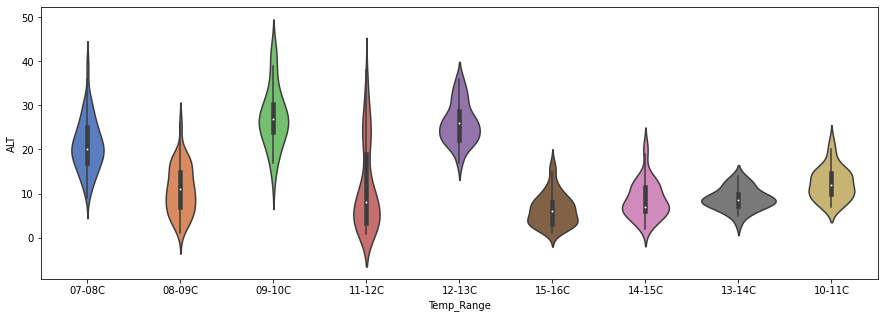

In [35]:
plt.figure(figsize=(15,5))
# ax = sns.violinplot(x="Temp_Range", y="ALT", hue="Weight_Range",
#                     data=df, palette="muted")
ax = sns.violinplot(x="Temp_Range", y="ALT",data=df, palette="muted")

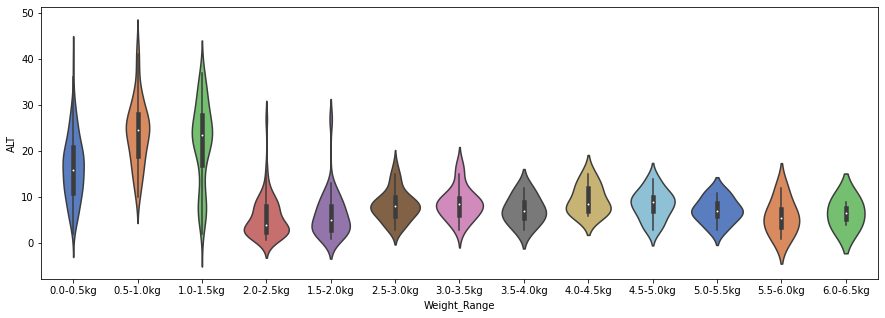

In [36]:
plt.figure(figsize=(15,5))
# ax = sns.violinplot(x="Temp_Range", y="ALT", hue="Weight_Range",
#                     data=df, palette="muted")
ax = sns.violinplot(x="Weight_Range", y="ALT",data=df, palette="muted")

In [39]:
#perform two-way ANOVA:https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html
model = ols('ALP ~  C(Weight_Range) + C(Temp_Range) + C(Weight_Range):C(Temp_Range)', data=df).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Weight_Range),12.0,3.153483e+06,2.627902e+05,16.784588,4.210598e-31
C(Temp_Range),8.0,8.256346e+06,1.032043e+06,65.917296,2.737769e-77
C(Weight_Range):C(Temp_Range),96.0,2.324950e+06,2.421823e+04,1.546834,1.391903e-03
Residual,602.0,9.425297e+06,1.565664e+04,NaN,NaN


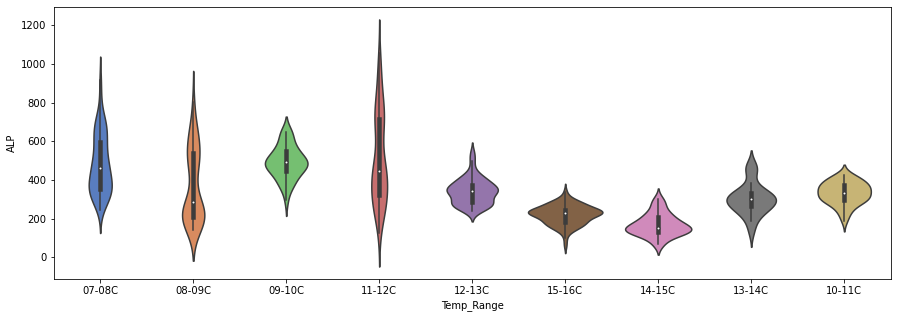

In [38]:
plt.figure(figsize=(15,5))
# ax = sns.violinplot(x="Temp_Range", y="ALT", hue="Weight_Range",
#                     data=df, palette="muted")
ax = sns.violinplot(x="Temp_Range", y="ALP",data=df, palette="muted")

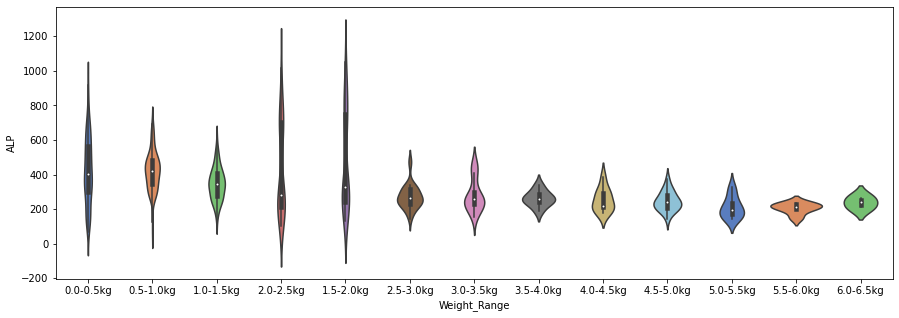

In [37]:
plt.figure(figsize=(15,5))
# ax = sns.violinplot(x="Temp_Range", y="ALT", hue="Weight_Range",
#                     data=df, palette="muted")
ax = sns.violinplot(x="Weight_Range", y="ALP",data=df, palette="muted")